# **Predicting Customer Churn**

Opening credit cards just to receive welcome bonuses or other perks is known as credit card churning. Closing cards usually entails doing so after the bonus posts to your account and before the subsequent yearly fee is assessed. For card issuers, a trend of fast opening and closing cards is frequently cause for concern.

Data: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download

###### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### Loading the dataset

In [ ]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

#### Data Preprocessing


*   Missing Data
*   Duplicate Data
*   Useless Columns



Checking for missing values

In [ ]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Duplicate Rows

In [ ]:
df.duplicated().unique()

array([False])

False indicates there are no duplicate values

Dropping Useless Columns

In [ ]:
df=df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], axis=1)

#### EDA

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


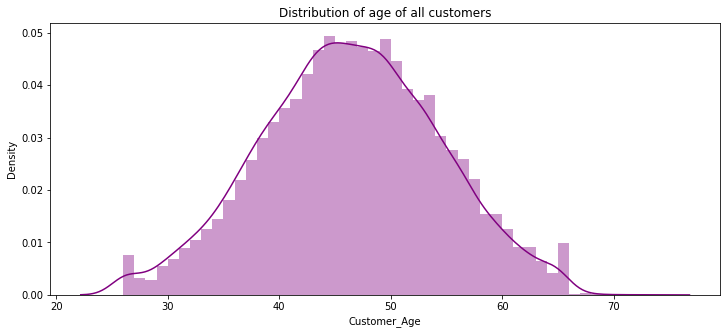

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age of all customers")
ax = sns.distplot(df["Customer_Age"], color = 'purple')

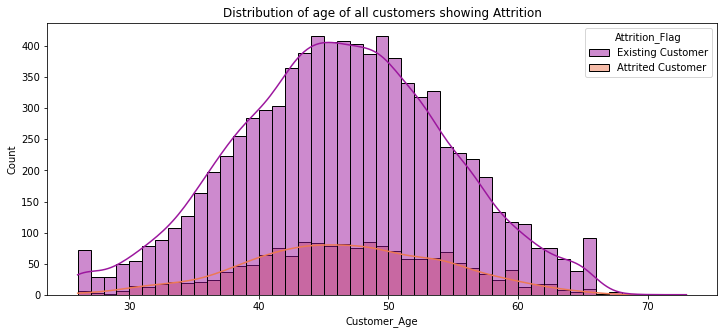

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age of all customers showing Attrition")
ax = sns.histplot(data=df,x='Customer_Age',hue='Attrition_Flag',kde=True, palette='plasma');

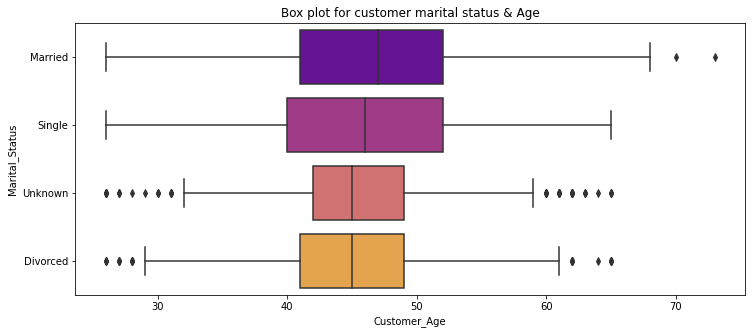

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for customer marital status & Age")
sns.boxplot(y="Marital_Status", x="Customer_Age", data =  df , orient="h", palette = 'plasma')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


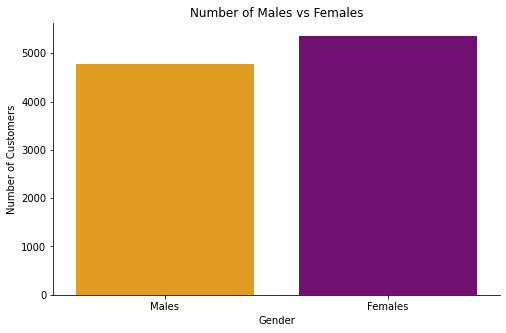

In [ ]:
#Males vs Females
plt.figure(figsize=(8,5))
sns.countplot(df['Gender'], palette=['orange', 'purple']);
sns.despine()
plt.title('Number of Males vs Females')
plt.xticks(ticks=[0,1], labels= ['Males', 'Females'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers');

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Bar Plot showing number of Card Category')

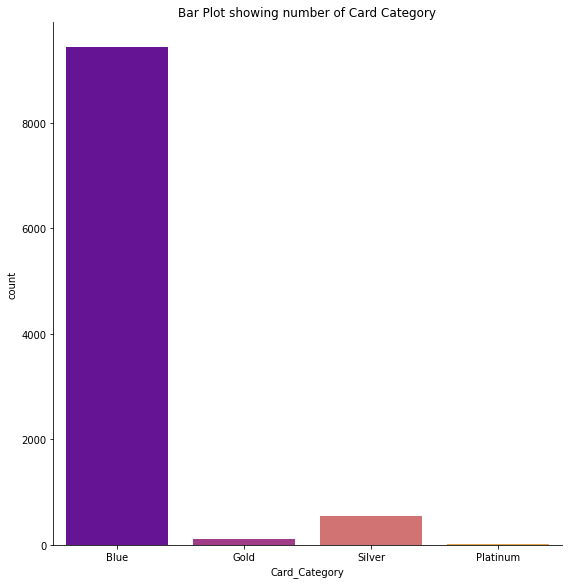

In [ ]:
sns.catplot(x="Card_Category", kind="count", palette="plasma", data=df, size = 8)
plt.title("Bar Plot showing number of Card Category")

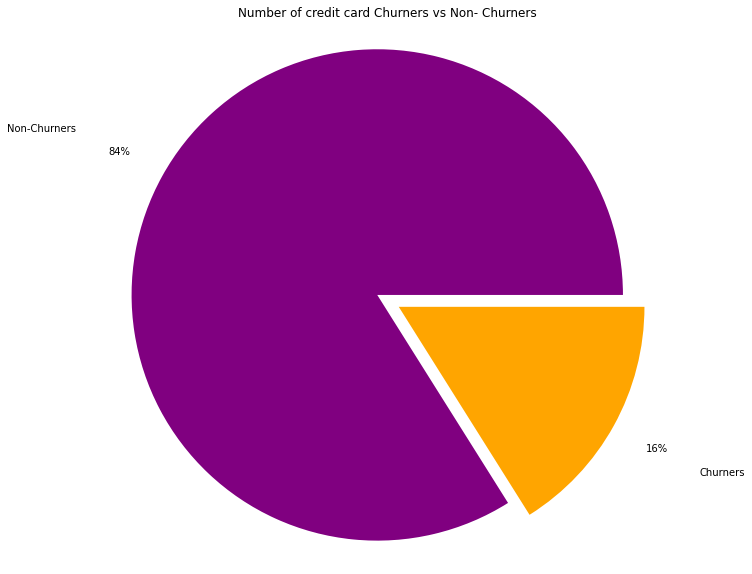

In [ ]:
plt.figure(figsize=[10,10])
sorted_counts= df.Attrition_Flag.value_counts()
plt.pie(sorted_counts, explode=(0.1,0),labels=['Non-Churners', 'Churners'],  
       colors=['Purple', 'Orange'], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.title("Number of credit card Churners vs Non- Churners");

Correlation

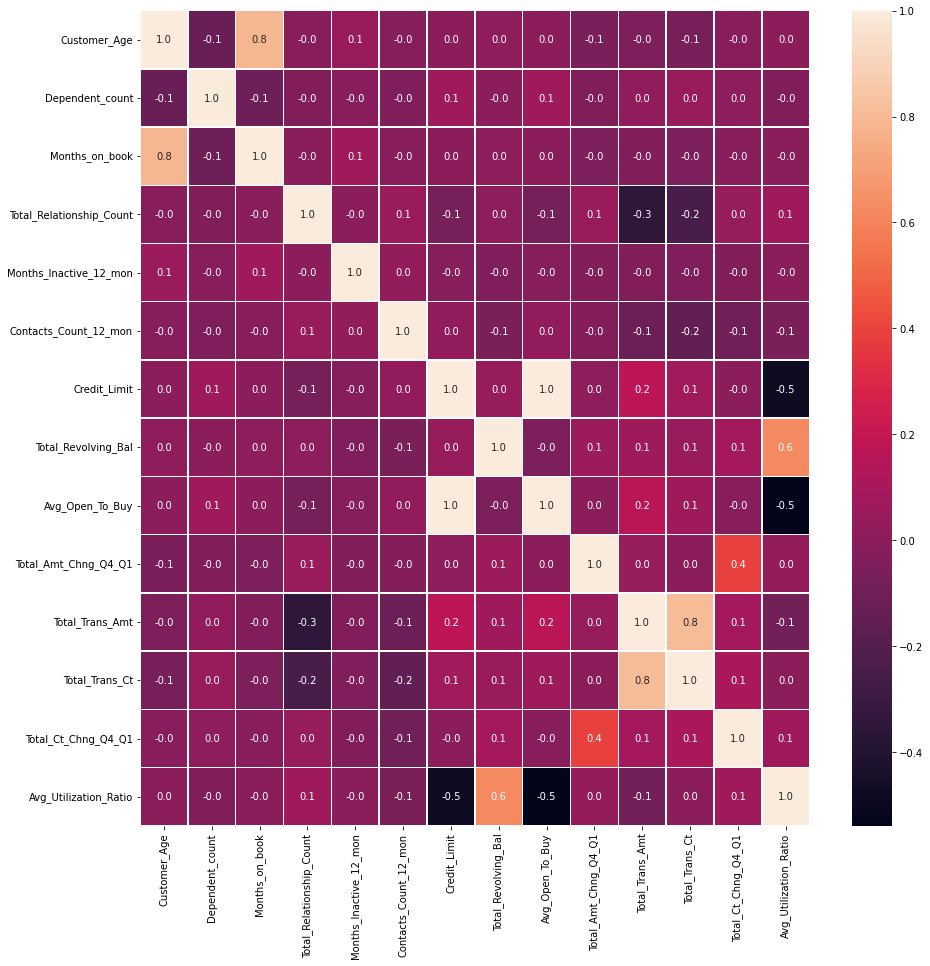

In [ ]:
#Heatmap showing correlation amongst the graphs
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Creating Dummy Variables

In [ ]:
#Identifying Categorical Columns
cat_cols = ['Attrition_Flag' ,'Gender' ,'Education_Level' , 'Marital_Status', 'Income_Category' , 'Card_Category']

#Converting categorical columns to numerical columns
df = pd.get_dummies(
    df,columns=cat_cols
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  int64  
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  int64  
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

In [ ]:
#import statsmodels.formula.api as smf
#logit = smf.logit('Customer_Age~Credit_Limit', data=df).fit()
#print(logit.summary())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  int64  
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  int64  
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

Model Building

In [ ]:
#Creating independent and Dependent Variables
X=df.drop(['Attrition_Flag_Existing Customer', 'Attrition_Flag_Attrited Customer'],axis=1)
Y=df[['Attrition_Flag_Existing Customer']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

Splitting into training and testing 

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=60)

Running a logistic regression on all features

In [ ]:
model=LogisticRegression(C=70,max_iter=50000)
model.fit(X_train, np.ravel(Y_train))

print('Logistic Regression Accuracy Results:')
print('Traning Model accuracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accuracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

Logistic Regression Accuracy Results:
Traning Model accuracy: 88.87%
Test Model accuracy: 90.52%


In [ ]:
(model.coef_[0])

array([-2.00572015e-02, -1.47483223e-01, -8.62379601e-04,  3.78171720e-01,
       -6.26611895e-01, -6.72620613e-01,  2.88107371e-04,  5.81077086e-04,
       -2.92969714e-04,  9.15543849e-02, -4.25914902e-04,  1.04354391e-01,
        3.36233814e-01, -1.76989707e-02, -3.06125201e-01,  1.79712377e-01,
        7.65512814e-03, -4.21223126e-02, -1.42698432e-03,  1.34807026e-02,
       -4.26623832e-02, -1.19589013e-02, -4.93780739e-02, -3.45936428e-02,
        1.89008932e-01, -2.16550498e-01, -6.42776151e-02, -1.88330521e-02,
        9.45797104e-03,  9.36000871e-02,  2.17281607e-02, -1.73246673e-01,
       -5.91193184e-02, -8.20723795e-02, -1.98434539e-02, -4.23327119e-03,
       -2.02637199e-02])

Selecting features

In [ ]:
feature_cols = [x for x in df.columns if x not in ['Attrition_Flag_Existing Customer', 'CLIENTNUM', 'Attrition_Flag_Attrited Customer']]
df1= df[feature_cols]

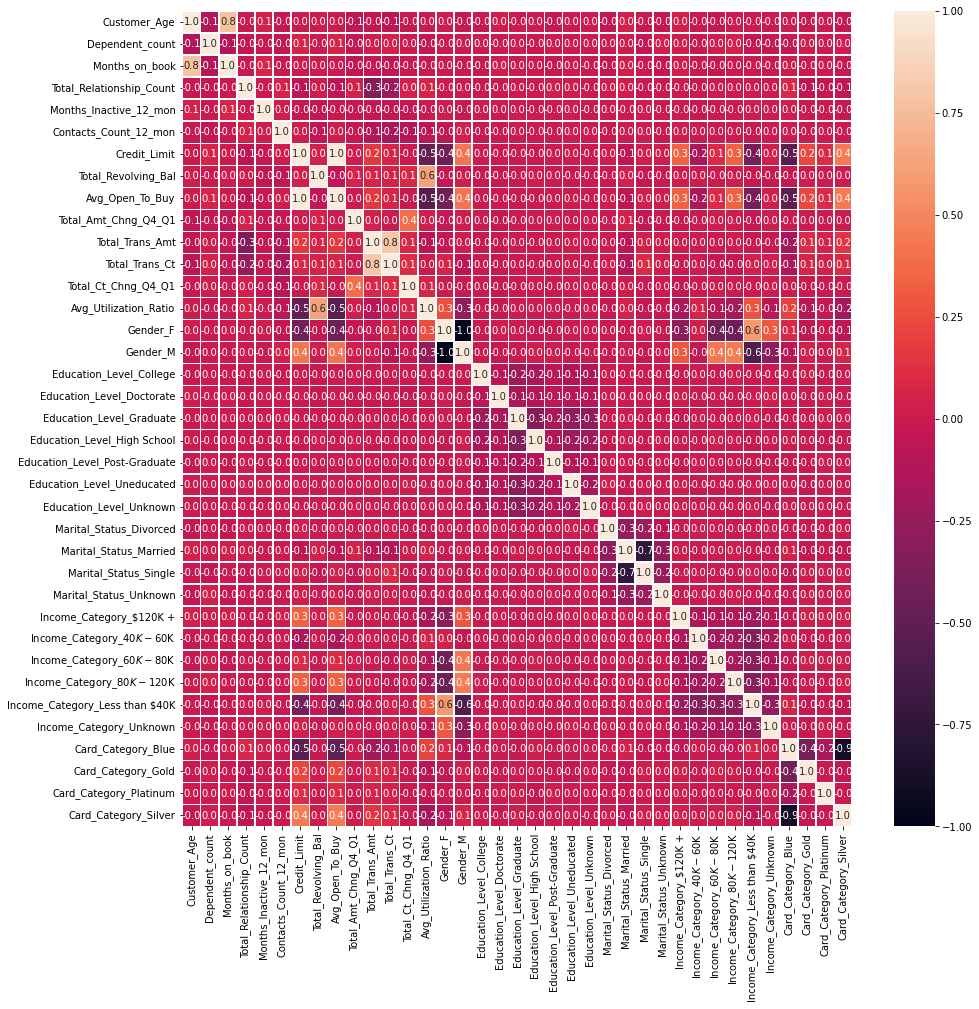

In [ ]:
#Heatmap showing correlation amongst the graphs
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top 10 Correlations: ")
print(get_top_abs_correlations(df1, 10))

Top 10 Correlations: 
Gender_F                Gender_M                          1.000000
Credit_Limit            Avg_Open_To_Buy                   0.995981
Card_Category_Blue      Card_Category_Silver              0.889816
Total_Trans_Amt         Total_Trans_Ct                    0.807192
Customer_Age            Months_on_book                    0.788912
Marital_Status_Married  Marital_Status_Single             0.741185
Total_Revolving_Bal     Avg_Utilization_Ratio             0.624022
Gender_M                Income_Category_Less than $40K    0.580016
Gender_F                Income_Category_Less than $40K    0.580016
Avg_Open_To_Buy         Avg_Utilization_Ratio             0.538808
dtype: float64


Seeing the above correlation patterns, we can remove one out of the pair of highly correlated variables (more than 90%) like 

*   Gender_F & Gender_M
*   Credit_Limit & Avg_Open_To_Buy




In [ ]:
columns_drop = ['Gender_M', 'Avg_Open_To_Buy']
X= X.drop(columns=columns_drop)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 9   Total_Trans_Amt                 10127 non-null  int64  
 10  Total_Trans_Ct                  10127 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1             10127 non-null  float64
 12  Avg_Utilization_Ratio           

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=60)
model=LogisticRegression(C=70,max_iter=50000)
model.fit(X_train, np.ravel(Y_train))

print('Logistic Regression Accuracy Results:')
print('Traning Model accuracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accuracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

Logistic Regression Accuracy Results:
Traning Model accuracy: 89.44%
Test Model accuracy: 90.64%


In [ ]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_F',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='obje

In [ ]:
(model.coef_[0])

array([-2.69449357e-02, -2.38518357e-01,  8.66505178e-03,  3.62165075e-01,
       -6.58386053e-01, -6.06054664e-01, -1.44387443e-05,  8.88604069e-04,
        2.77069402e-01, -4.78376414e-04,  1.15481499e-01,  1.01906108e+00,
       -3.82819282e-02, -7.89723619e-01,  2.90856329e-02, -1.24263599e-01,
        4.75400530e-03,  2.49961969e-02, -1.35685661e-01, -1.31387544e-02,
       -1.25673115e-01, -1.05697089e-01,  4.27082135e-01, -4.66547076e-01,
       -1.94763264e-01, -8.44828879e-02,  2.04707710e-02,  2.25586628e-01,
        3.60835274e-02, -3.87417337e-01, -1.50165995e-01, -2.02437672e-01,
       -6.09779771e-02, -1.23082598e-02, -6.42013851e-02])

Attrition_Flag_Existing Customer =  (-2.69449357e-02 x Customer_Age) - (2.38518357e-01 x Dependent_count) + ( 8.66505178e-03 x Months_on_book) + ...

Model 2: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X=df[set(feature_cols) - set(columns_drop)]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=60)

model=DecisionTreeClassifier(max_depth=10, random_state=60)
model.fit(X_train, np.ravel(Y_train))


print('Decision Tree Accuracy: ')
print('Traning Model accuracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accuracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

Decision Tree Accuracy: 
Traning Model accuracy: 98.82%
Test Model accuracy: 94.19%
